In [113]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [114]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Dataset

In [115]:
data = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')
df = data.copy()

#Data Overview

##Displaying the first few rows of the dataset

In [116]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [117]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [118]:
df.shape

(25480, 12)

- We have 25480 rows and 12 columns in our dataset

##Checking the data types of the columns for the dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [120]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [121]:
for item in cols.columns:
  df[item] = df[item].astype('category')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


- `no_of_employees` column has mean value of 5667 and the median is 2109 which clearly indicates the right skewness of the dataset. The minimum value is a negative value which is not to be considered in this case and their are some positive outliers present inthe data which are will should have a look.
- `yr_of_estab` column indicates the year of the company been established. the company establishment range from 1800 to 2016.
- `prevailing_wage` column indicates the wage which the employees are getting.The Mean value is 74455 which is greater compared to median which is 70308 which indicates the skewness is on the right. The Minimum value is 2.137 which is quite low which we should be having a look.

In [124]:
df.describe(include= 'category').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- `case_id` column seems to have unique IDs for each case, as the count and unique values are the same 25480.
- `continent` Asia is the most frequent continent with 16861 occurrences out of 25480. There are 6 unique continents in the data.
- In `education_of_employee` Most employees have a Bachelor's degree 10234 out of 25480 and there are 4 different education levels.
- In `has_job_experience` column Most employees have job experience 14802 out of 25480.
- `requires_job_training` column Most employees do not require job training 22525 out of 25480.
- `region_of_employment` column The Northeast region has the highest number of employees 7195 out of 25480 and there are 5 unique regions.
- In `unit_of_wage` column the most common unit of wage is "Year" 22962 out of 25480. There are 4 unique units of wage.
full_time_position: Most of the positions are full-time 22773 out of 25480.
- `case_status` column Most cases are "Certified" 17018 out of 25480.

##Checking for duplicate values

In [125]:
df.duplicated().sum()

0

- We don't have any duplicate value in our dataset

##Checking for missing values

In [126]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


- There is no Null values in our dataset.

In [127]:
df.drop(['case_id'], axis= 1, inplace = True)

In [128]:
# Create a copy of data to perform detailed EDA in the appendix section.
data_2 = df.copy()

In [129]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


#Exploratory Data Analysis

## Univariate Analysis

In [130]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [131]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [132]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [133]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

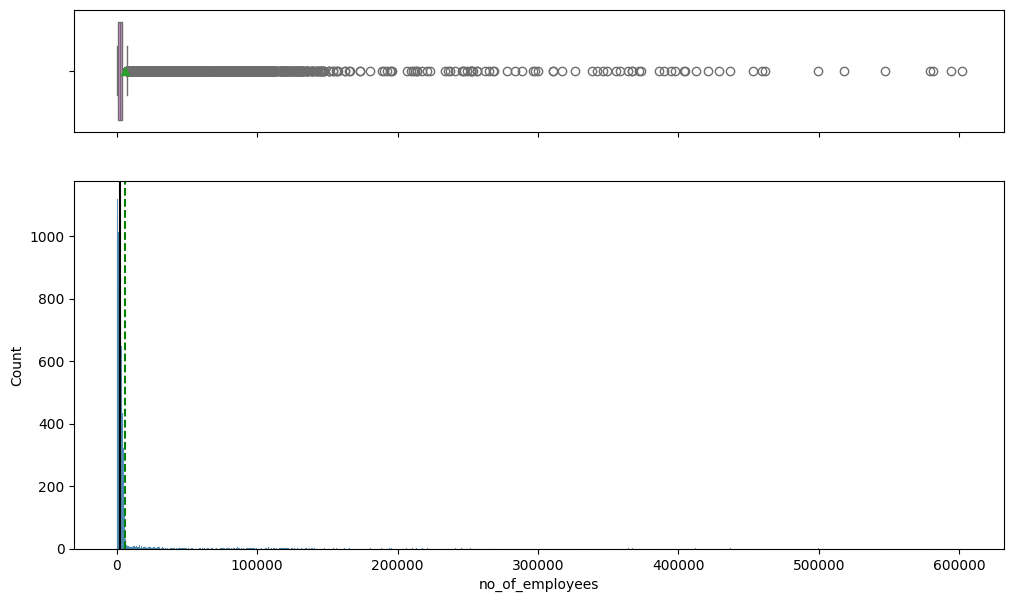

In [134]:
histogram_boxplot(df, 'no_of_employees')

- `no_of_employees` is highly skewed towards the right.
- We can see there are sme outliers present inthe plot which we need to have a look.

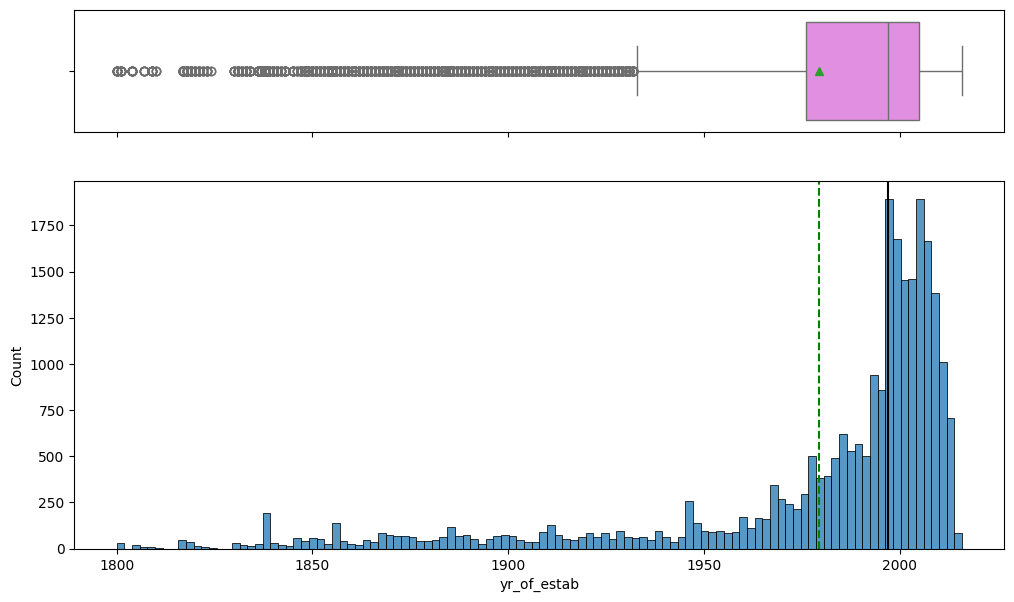

In [135]:
histogram_boxplot(df, 'yr_of_estab')

- `yr_of_estab` is skewed towards left.
- Most of them are established post 1950.

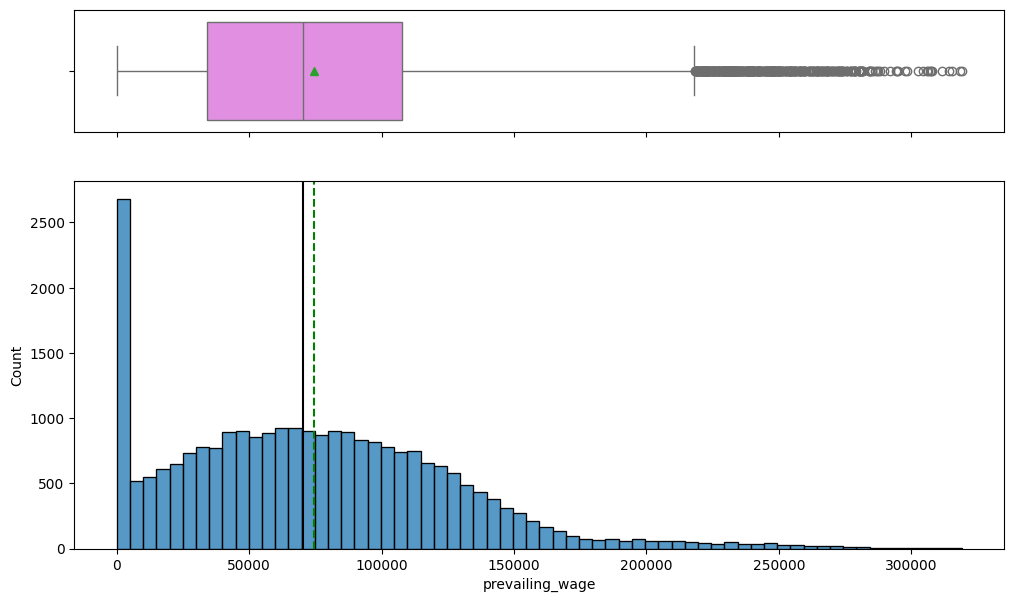

In [136]:
histogram_boxplot(df, 'prevailing_wage')

- `prevailing_wage` column has some values which is close to zero which we need have a look at.

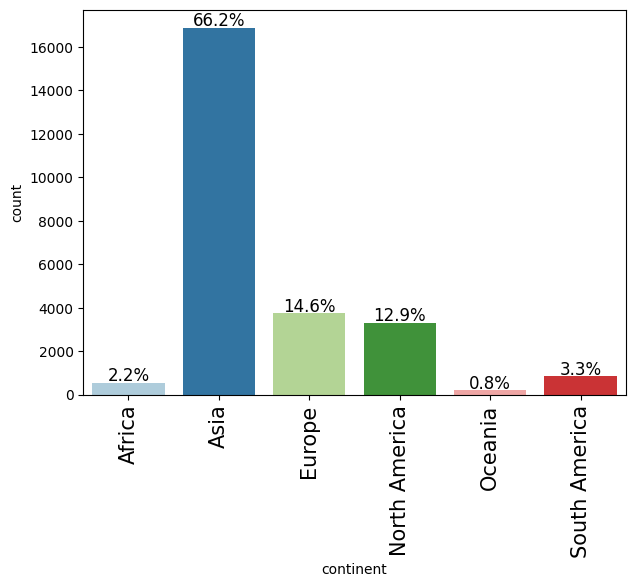

In [137]:
labeled_barplot(df, 'continent', perc = True)

- From the above plot we can see that the `continent` column have 6 values Asia, Africa, North America, Oceania and South America.
- Among those Majority of the employees (> 50%) are from Asia.
- Europe has some 14.6%, North america has 12.9%, South america has 3.3%, Africca has 2.2% and oceania has 0.8%.

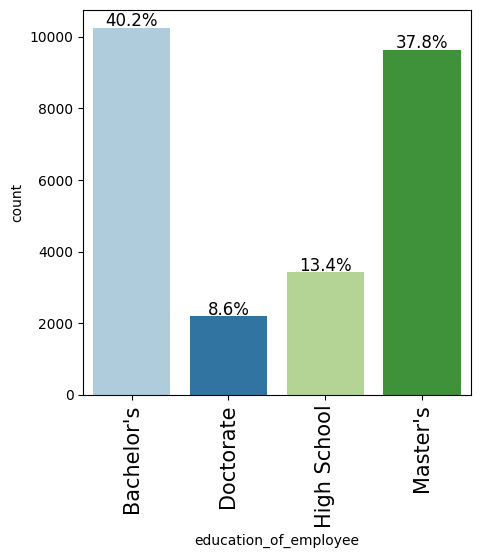

In [138]:
labeled_barplot(df, 'education_of_employee', perc = True)

- Majority of the employees have Bachelor's degree(40.2%) or Master's(37.8%), only minimum employees have Doctorate(8.6%) or High school(13.4%).

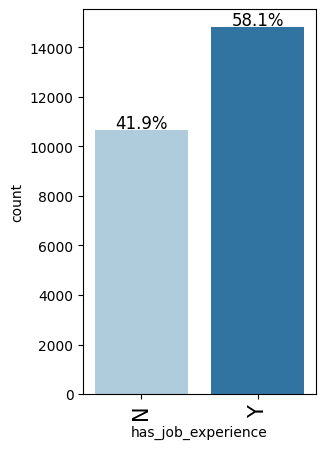

In [139]:
labeled_barplot(df, 'has_job_experience', perc = True)

- Most employees are experienced with 58.1% and 41.9% of employees are without experience.

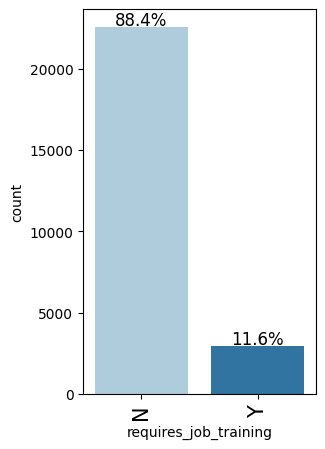

In [140]:
labeled_barplot(df, 'requires_job_training', perc = True)

- Its good to see that 88.4% of the employees do not require job training.
- Only 11.6% of the employees require job training.

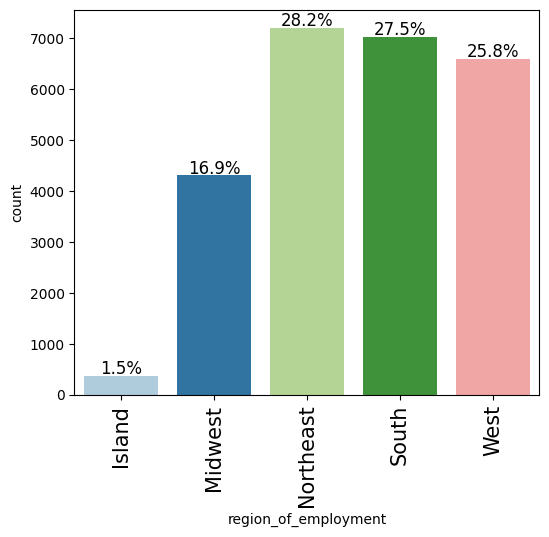

In [141]:
labeled_barplot(df, 'region_of_employment', perc = True)

- Northeast(28.2%), South(27.5%) and West(25.8%) have similar number of employees ranging from 25-29% applying for visa approval.
- Midwest(16.9%) and Island(1.5%) hase less employees compared to others.

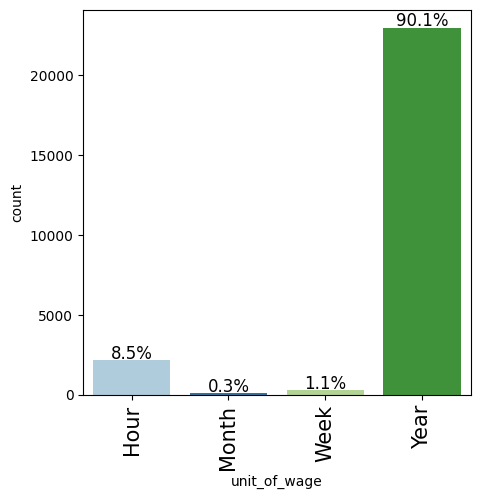

In [142]:
labeled_barplot(df, 'unit_of_wage', perc = True)

- 90.1% of employees are getting Yearly wages.
- 8.5% of the employees are getting Hourly wage.
- Minimum number of employees are getting wages on Monthly (0.3%) and Weekly (1.1%).

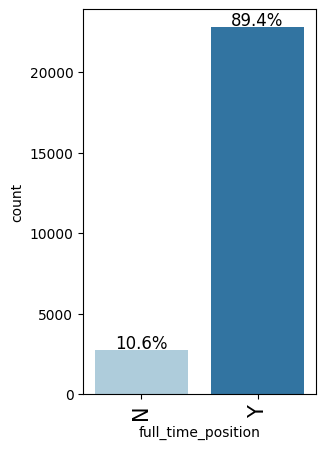

In [143]:
labeled_barplot(df, 'full_time_position', perc = True)

- Most of the employees applied visa are full time employees with 89.4% from overall.
- 10.6% of the applicannts have applied for Part time jobs.

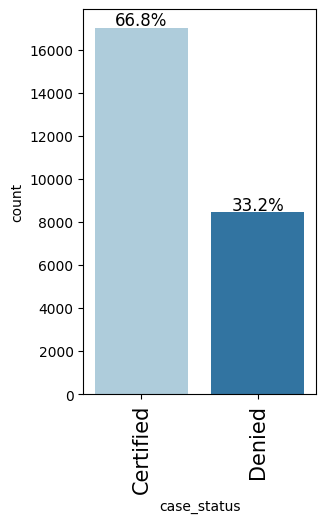

In [144]:
labeled_barplot(df, 'case_status', perc = True)

- From the above plot we can clearly see that most of the applications were certified( 66.8% ).
- There are 33.2% of the applications that are denied.

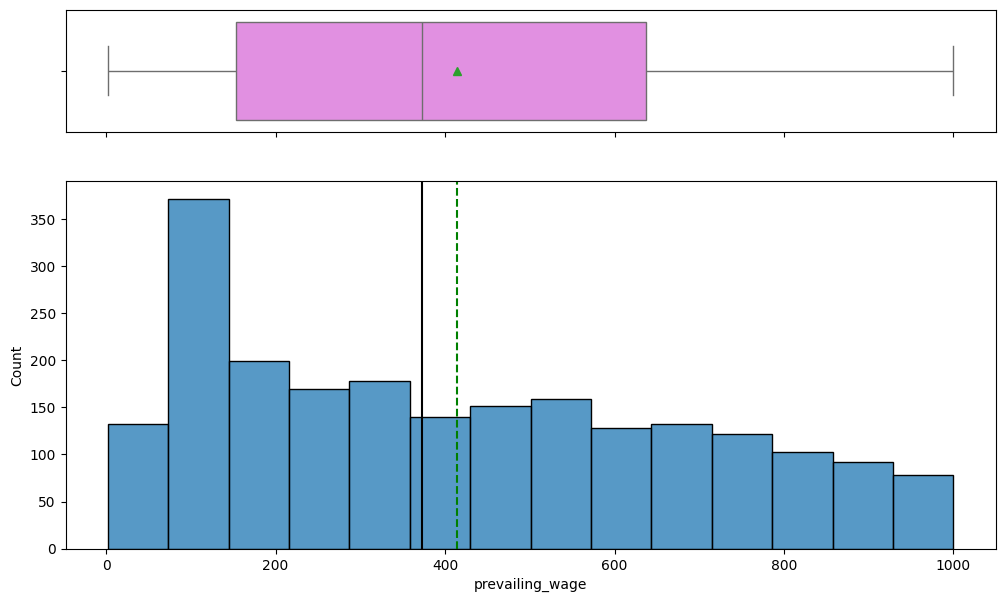

In [145]:
histogram_boxplot(df[(df['unit_of_wage'] == 'Hour')], 'prevailing_wage')

- Above plot tells hourly wages range from 0 to 1000 which and the mean and median values are close to 400.
- We can assume that the above values indicates the salary the employees are getting is weekly wage since 400 Dollars per hour is not normal.

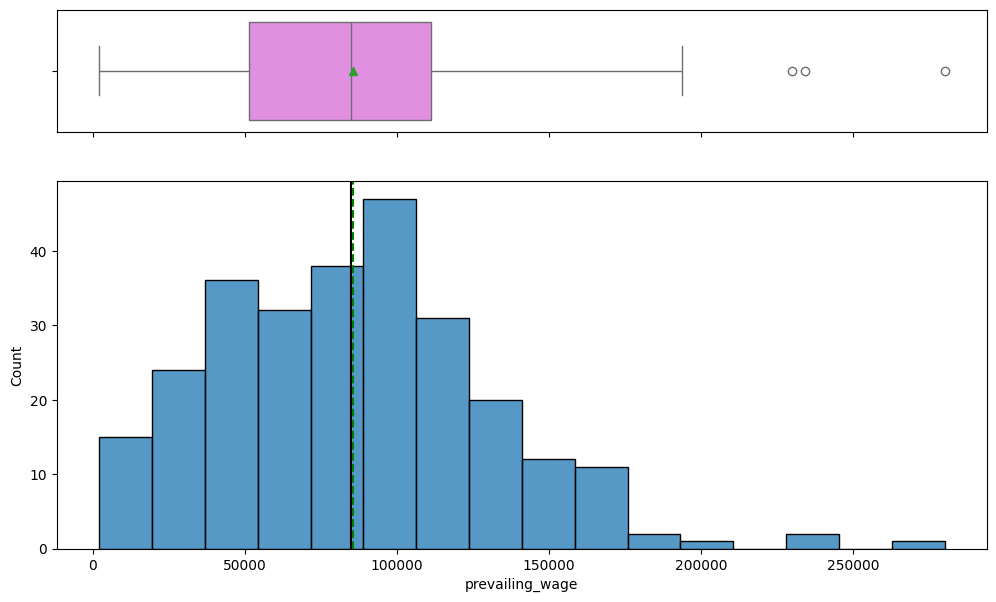

In [146]:
histogram_boxplot(df[(df['unit_of_wage'] == 'Week')], 'prevailing_wage')

- The mean and median values lies somewhere near 80000 to 90000 which appears to be incorrect we need to look into it.

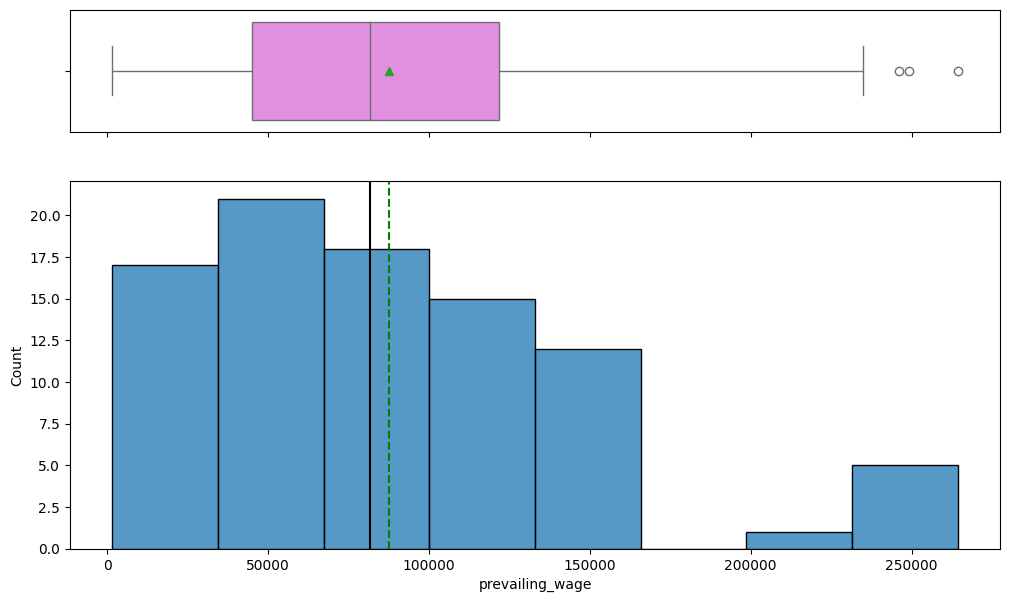

In [147]:
histogram_boxplot(df[(df['unit_of_wage'] == 'Month')], 'prevailing_wage')

- Similar to Weekly wages the Monthly wage mean and median value also lies near 80000 to 90000 USD which looks quite similar.

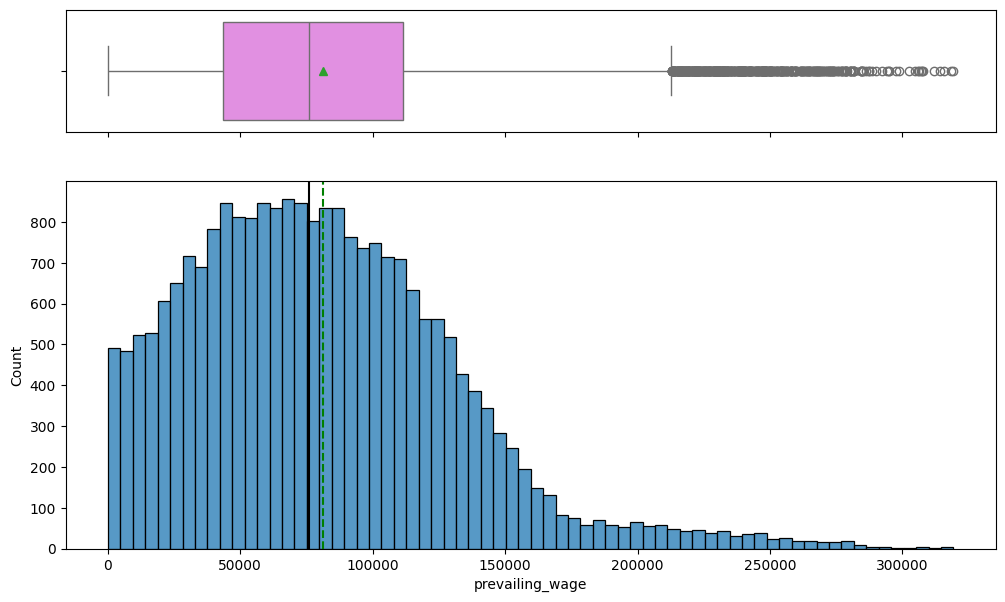

In [148]:
histogram_boxplot(df[(df['unit_of_wage'] == 'Year')], 'prevailing_wage')

- Similar to Weekly wages and Monthly wage the Yearly wages mean and median value also lies near 80000 to 90000 USD.
- From the above observation we can concude that the Weekly, Monthly and Yearly wages are all calculated annually.

In [149]:
df.loc[df['unit_of_wage'] == 'Hour', 'prevailing_wage'] = df.loc[df['unit_of_wage'] == 'Hour', 'prevailing_wage'] * 52

- Since we consider the hourly wages are weekly wages got by the employees we are multiplying with 52 to get the yearly.
- So that all the units of the column `unit_of_wages` will be in years.

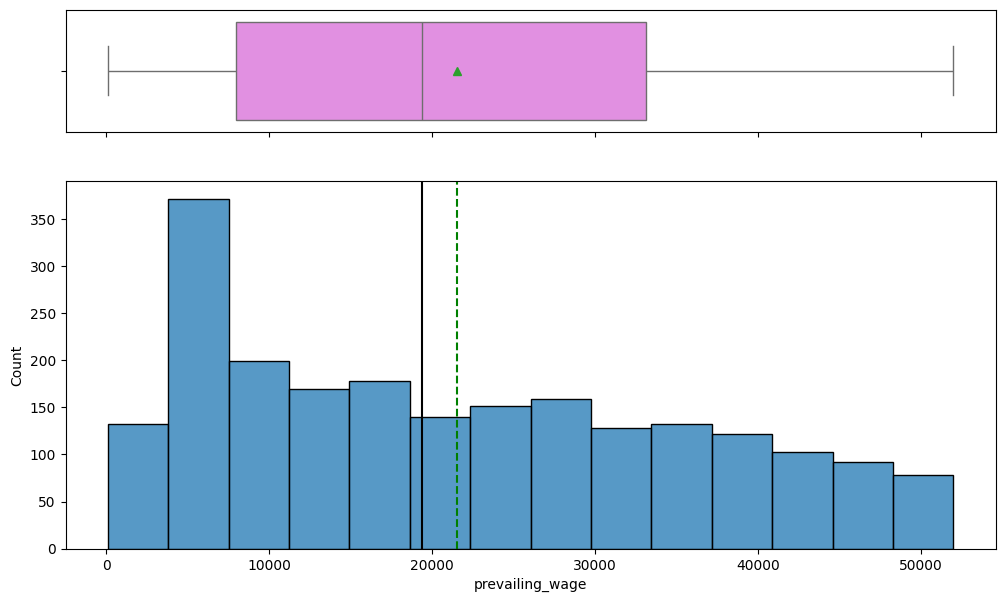

In [150]:
histogram_boxplot(df[(df['unit_of_wage'] == 'Hour')], 'prevailing_wage')

- After converting hourly wages to years and the above plot is the distribution for that.

In [151]:
df["unit_of_wage"] = df["unit_of_wage"].astype('object')
df.loc[df["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hourly"
df.loc[df["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Hourly"
df.loc[df["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Hourly"
df.loc[df["unit_of_wage"]=="Year", "unit_of_wage"] = "Not_Hourly"
df["unit_of_wage"] = df["unit_of_wage"].astype('category')

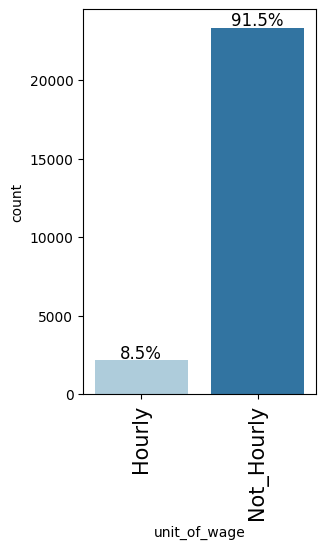

In [152]:
labeled_barplot(df, 'unit_of_wage' , perc= True)

- From the above plot after conversion the percentage of employees getting Hourly wages are 8.5% and Not_Hourly are 91.5%.

## Bivariate Analysis

<Axes: >

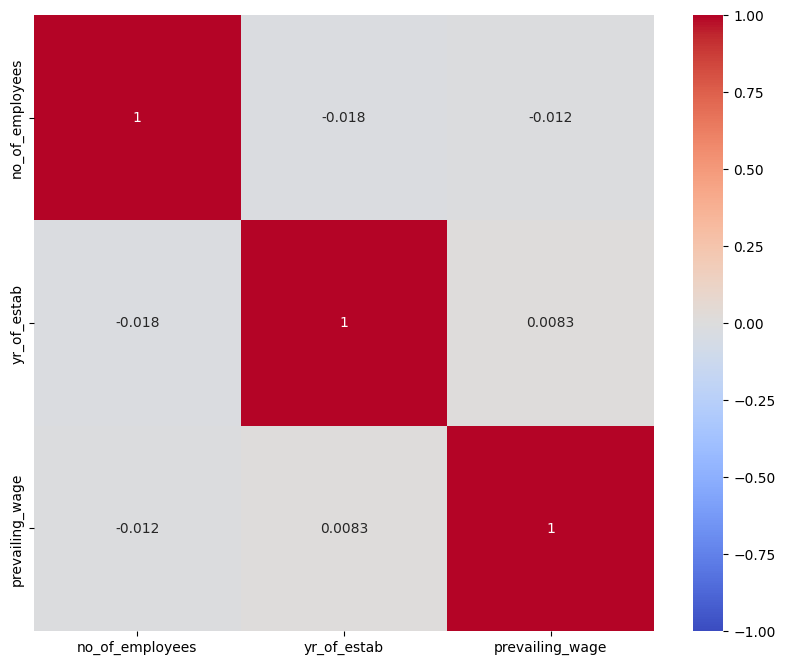

In [153]:
plt.figure(figsize=(10, 8))
x= df.select_dtypes(['int64','float64'])
sns.heatmap(x.corr(), annot = True, vmax= 1, vmin= -1, cmap= 'coolwarm')

- From the above heatmap we can clearly see that there is no strong relationship between the numerical columns.'
- There is a weak negative relationship between `prevailing_wage` vs `no_of_emplooyees` and `yr_of_estab` vs `no_of_employees`.
- `prevailing_wage` and `yr_of_estab` has some positive correlations between them.

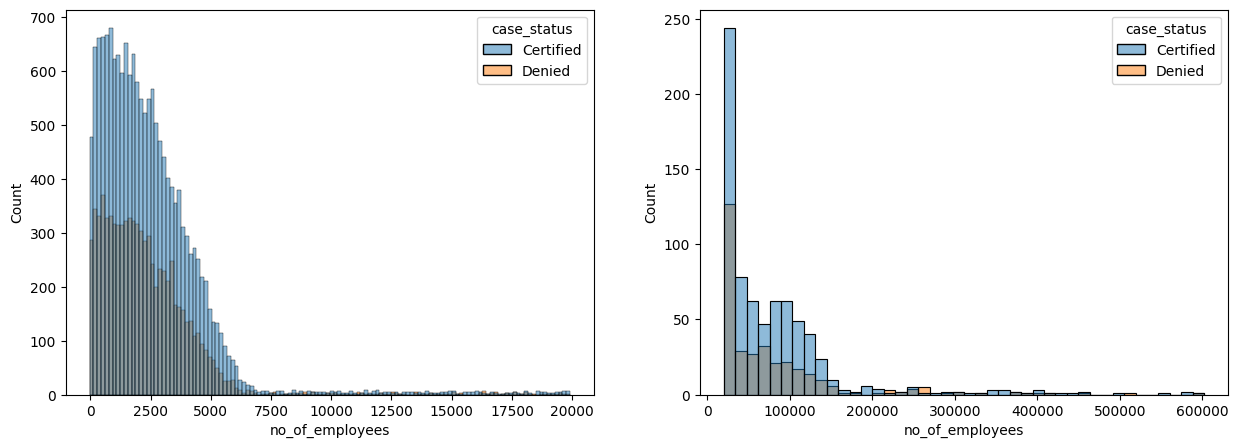

In [154]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df[df["no_of_employees"]<20000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=df[df["no_of_employees"]>20000], x="no_of_employees", hue="case_status", ax=ax[1]);

- From the above plot we can see that the there is a huge difference in number of cases that are certified and number of cases that are denied.
- Since the `no_of_employees` column doesn't have much relationship to the target variable we can split the continous data in `no_of_column` into 43 different category.

In [155]:
df["no_of_employees"] = pd.cut( df["no_of_employees"],
                                  [0, 2500, 7500, np.inf],
                                  labels = ["Small_Sized(<2500employees)",
                                            "Medium_Sized(2500-7500employees)",
                                            "Large_Sized(>75000employees)"])
df["no_of_employees"] = df["no_of_employees"].astype("category")

<Axes: xlabel='continent', ylabel='count'>

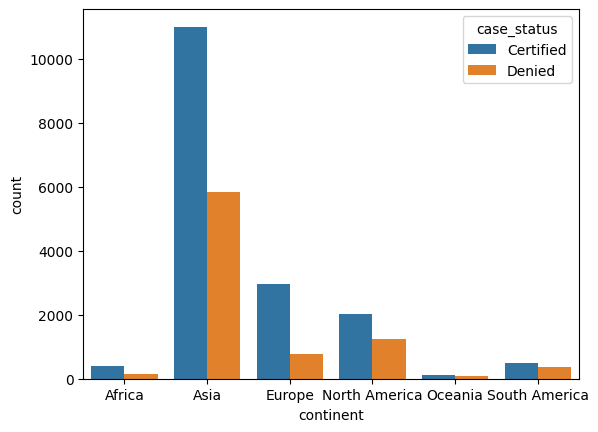

In [156]:
sns.countplot(data= df, x='continent', hue= 'case_status')

- From the above plot as expected  the number of employees who are certified for visa are more compared to denied across all countries.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


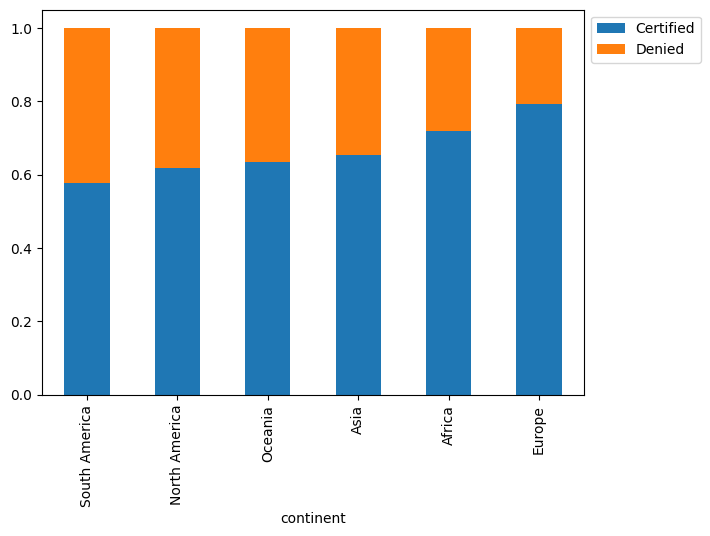

In [157]:
stacked_barplot(df, 'continent', 'case_status')

- From the above plot as expected  the number of employees who are certified for visa are more compared to denied across all countries.
- The Proportion with respect to certifications of the continents is Europe, Africa, Asia, Oceania, North america, South america.

<Axes: xlabel='education_of_employee', ylabel='count'>

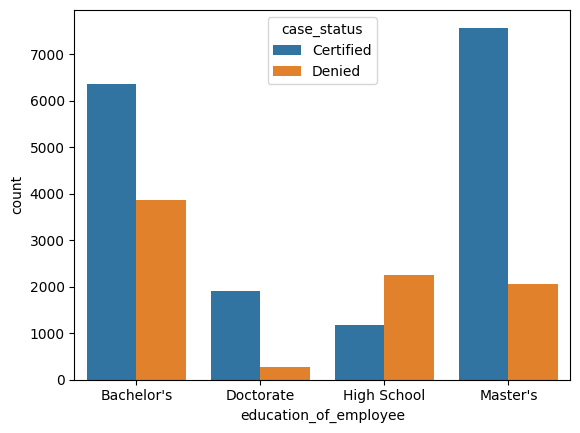

In [158]:
sns.countplot(df, x= 'education_of_employee', hue= 'case_status')

- From the above countplot the employees who have master's degree have higher certified values compared to denied.
- The employees with bachelor's degree also have more certified vallues compared to denied.
- People with High school degree have been denied for visa and only few cases it has been approved.
- Docatrate employees seem to have higher proportion with certified and denied.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


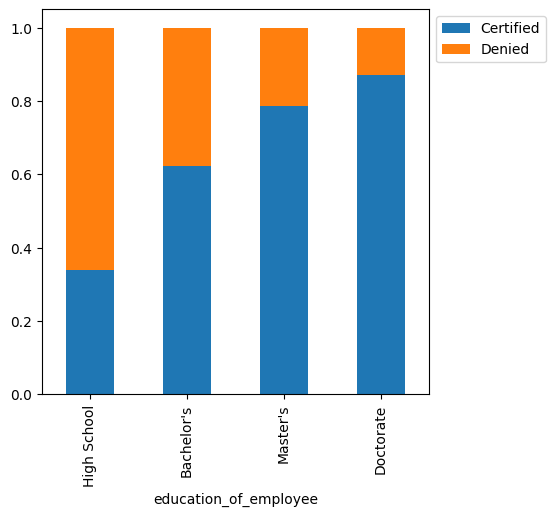

In [159]:
stacked_barplot(df, 'education_of_employee', 'case_status')

- The Proportion with respect to certifications of the `education_of_employee` is Doctrate > Master > Bachelor > High school.

<Axes: xlabel='has_job_experience', ylabel='count'>

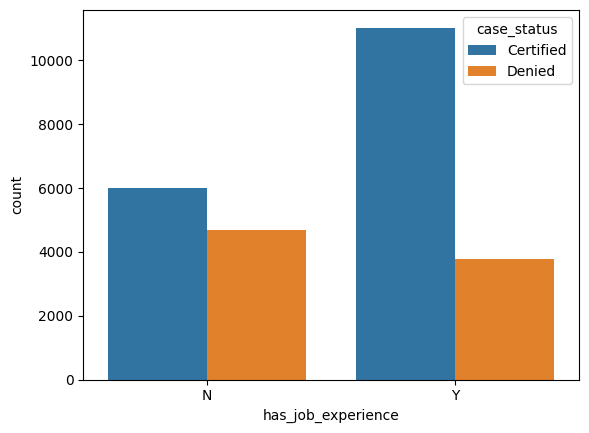

In [160]:
sns.countplot(df, x= 'has_job_experience', hue= 'case_status')

- As expected the people who have prior work experience have are more approved for visa.
- The proportion for certified and denied for employees witgout previous work experience seems to be equal.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


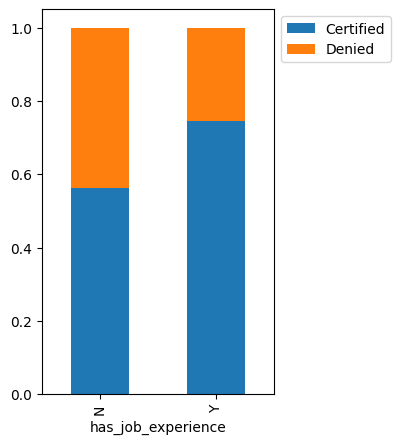

In [161]:
stacked_barplot(df, 'has_job_experience', 'case_status')

- From the above plot we can clearly see that the proportion of people having certified for visa have previous job work experience.

<Axes: xlabel='requires_job_training', ylabel='count'>

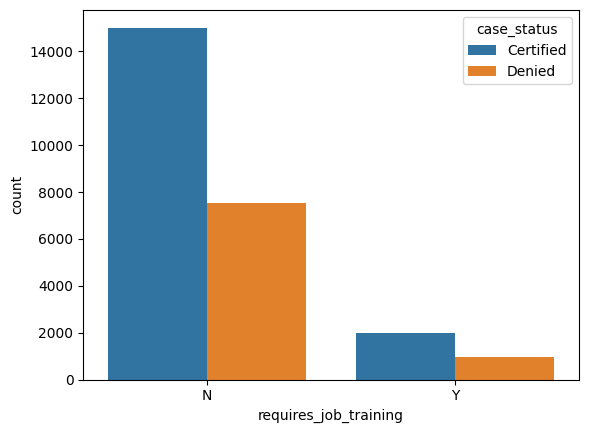

In [162]:
sns.countplot(df, x= 'requires_job_training', hue= 'case_status')

- From the above the graph we can telll that people who doesn't want job training.
- people who requires job training are less in number and the proportion is less.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


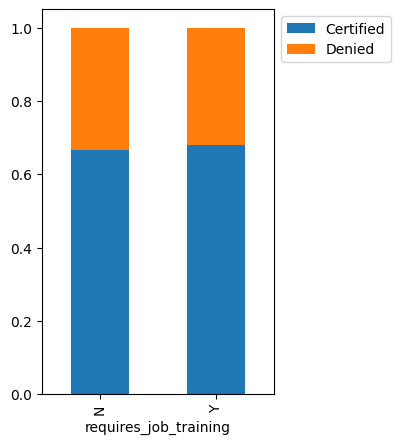

In [163]:
stacked_barplot(df, 'requires_job_training', 'case_status')

- From the above plot we can clearly see that both people requiring job training and people who doesn't require job training have similar proprtion.

case_status                       Certified  Denied    All
no_of_employees                                           
All                                   17001    8446  25447
Small_Sized(<2500employees)            9674    5084  14758
Medium_Sized(2500-7500employees)       6272    2874   9146
Large_Sized(>75000employees)           1055     488   1543
------------------------------------------------------------------------------------------------------------------------


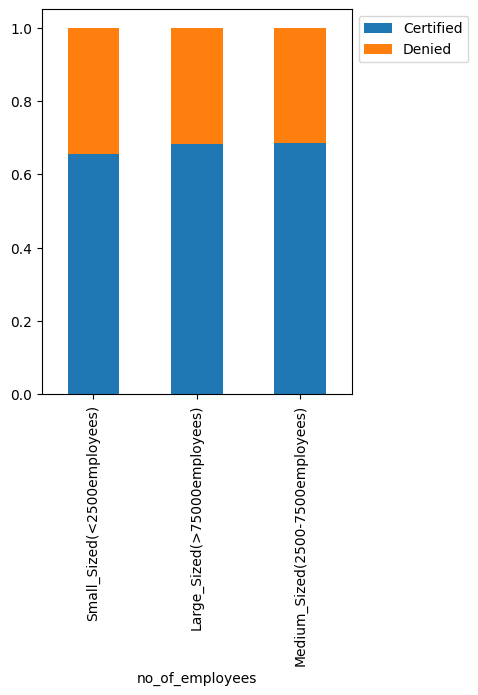

In [164]:
stacked_barplot(df, 'no_of_employees', 'case_status')

- There is very small difference in trends with respect to `case_status` in `no_of_employees`, Medium_Sized > Large_Sized > Small_Sized.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


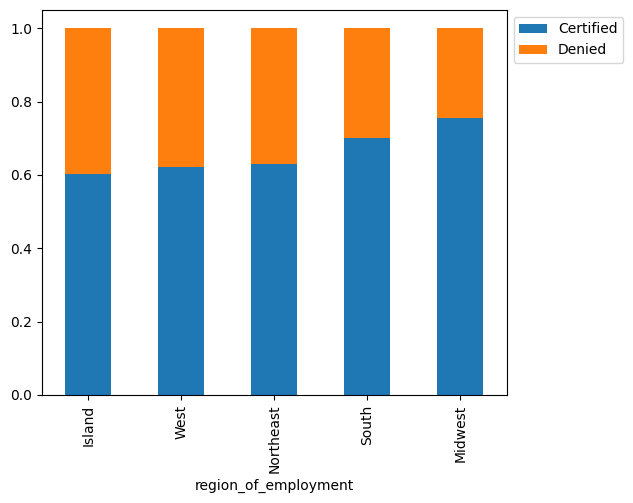

In [165]:
stacked_barplot(df, 'region_of_employment', 'case_status')

- The above plot tells us that the proption betwwen the region of employement is in order: Midwest > South > Northwest > Island.
- The proportion betwween certified and denied for Northwest, West and Island have similar proportions.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


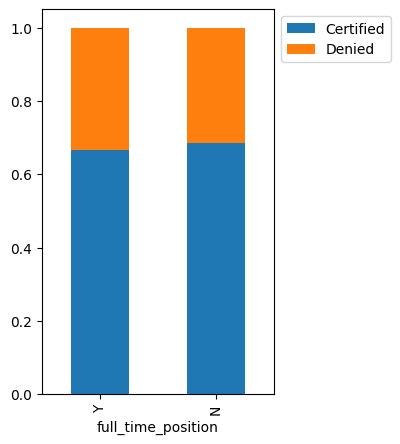

In [166]:
stacked_barplot(df, 'full_time_position', 'case_status')

The Proportion for the above plot with respect to visa certification full_time_position is Yes ~ No.

<Axes: xlabel='unit_of_wage', ylabel='count'>

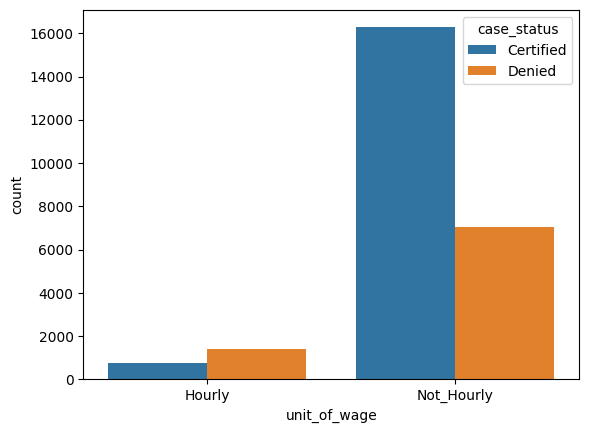

In [167]:
sns.countplot(df, x = 'unit_of_wage' , hue = 'case_status')

- Most of the Not_Hourly employees have more cases where they are certified than denied.
- It is interesting to see that the people who are getting Hourly wages have more denied cases than certified cases.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Not_Hourly        16271    7052  23323
Hourly              747    1410   2157
------------------------------------------------------------------------------------------------------------------------


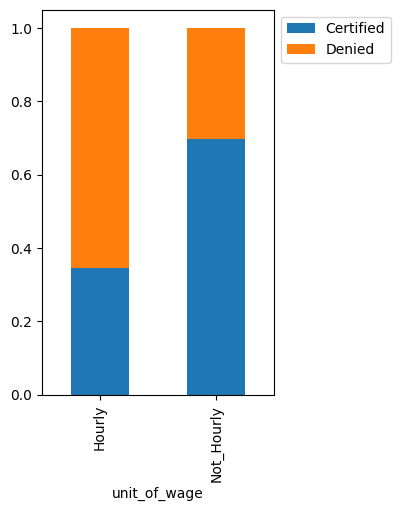

In [168]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

- From the above, the trend is with respect to visa certifications is Not_Hourly > Hourly.

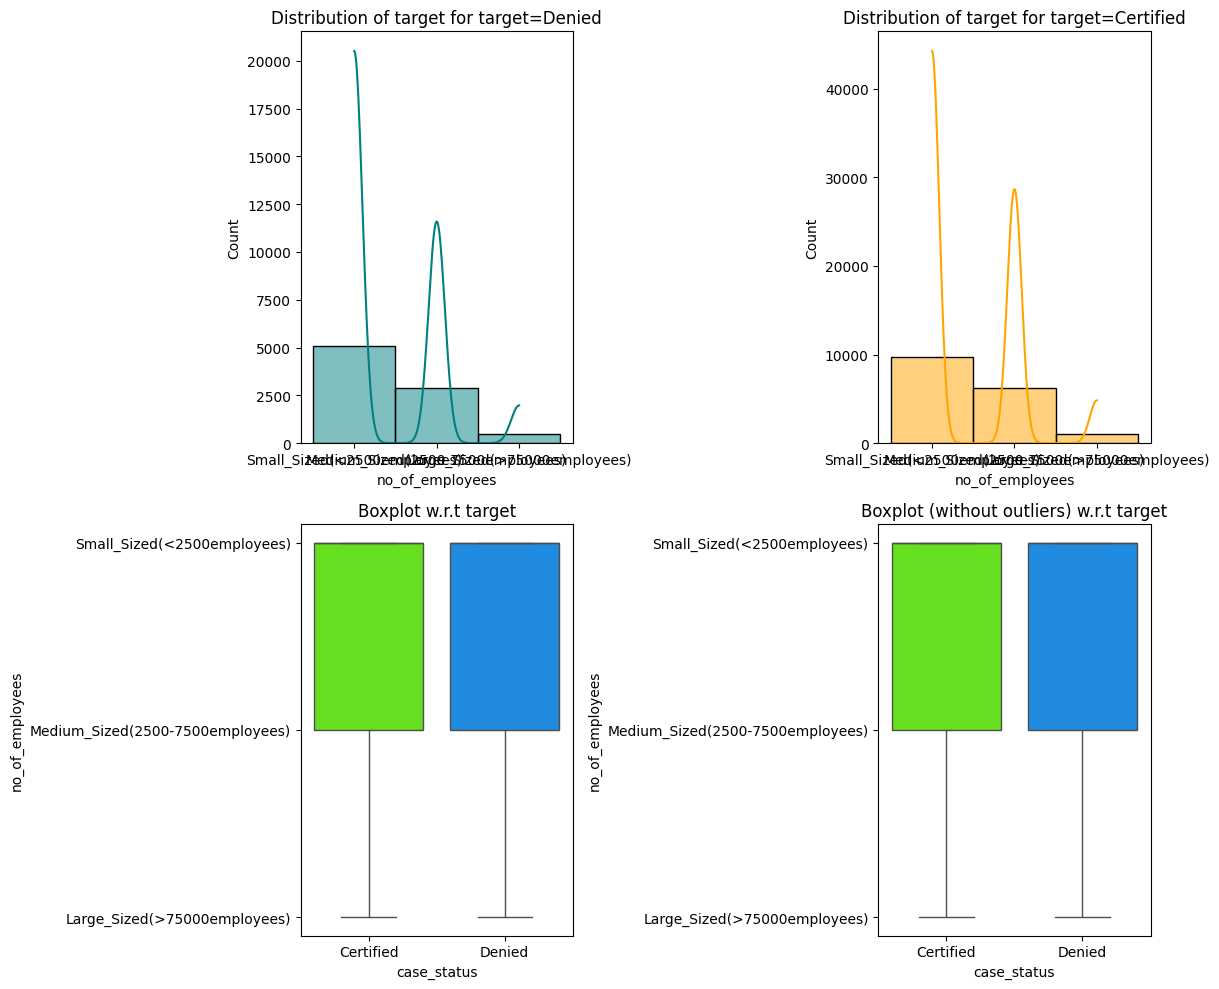

In [169]:
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

- From the above plots we can see the distribution of no_of_employees with respect to case_status.
- we can see that the median of the certified and denied have approximately similar and near to 2000 no_of_employees.

#Data preprocessing

## Outliers treatment

In [170]:
def calculate_whiskers(data, column):
    """
    Calculates the upper and lower whiskers for a box plot.

    Args:
        data: The input DataFrame.
        column: The name of the column to calculate whiskers for.

    Returns:
        A tuple containing the lower whisker and upper whisker.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    return lower_whisker, upper_whisker


In [171]:
def outlier_percentage(data, column):
    """
    Calculates the percentage of outliers in a column.

    Args:
        data: The input DataFrame.
        column: The name of the column to calculate outlier percentage for.

    Returns:
        The percentage of outliers in the column.
    """
    lower_whisker, upper_whisker = calculate_whiskers(data, column)
    num_outliers = ((data[column] < lower_whisker) | (data[column] > upper_whisker)).sum()
    percentage = round((num_outliers / len(data)) * 100, 2)
    return percentage

# Example usage:
percentage = outlier_percentage(df, 'prevailing_wage')
print("Outlier Percentage:", percentage)

Outlier Percentage: 1.83


In [172]:
outlier_percentage(df, 'yr_of_estab')

12.79

The outlier percentage for `yr_of_estab` column is 12.79%.

In [173]:
outlier_percentage(df, 'prevailing_wage')

1.83

The outlier percentage for `prevailing_wage` column is 1.83%.

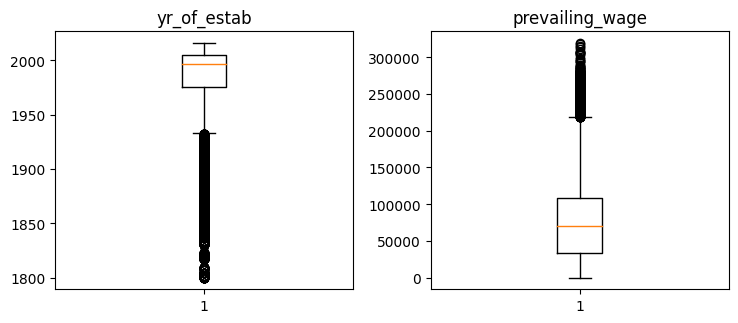

In [259]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We can leave those outliers without treating them since these values are good and legit.

## Converting Target variable to 0 and 1


In [174]:
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})

In [175]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,Large_Sized(>75000employees),2007,West,30794.551,Hourly,Y,0
1,Asia,Master's,Y,N,Small_Sized(<2500employees),2002,Northeast,83425.650,Not_Hourly,Y,1
2,Asia,Bachelor's,N,Y,Large_Sized(>75000employees),2008,West,122996.860,Not_Hourly,Y,0
3,Asia,Bachelor's,N,N,Small_Sized(<2500employees),1897,West,83434.030,Not_Hourly,Y,0
4,Africa,Master's,Y,N,Small_Sized(<2500employees),2005,South,149907.390,Not_Hourly,Y,1


In [261]:
df['case_status'].value_counts()

,count
case_status,
1,17018
0,8462


## Splitting the data into train and test set

In [226]:
x = df.drop(['case_status'], axis= 1)
y = df['case_status']

In [227]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 1, stratify = y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.25, random_state = 1, stratify = y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [228]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


In [229]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
no_of_employees
Small_Sized(<2500employees)         8905
Medium_Sized(2500-7500employees)    5447
Large_Sized(>75000employees)         921
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Not_Hourly    14002
Hourly         1286
Name: count, dtype: in

In [230]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
no_of_employees
Small_Sized(<2500employees)         2920
Medium_Sized(2500-7500employees)    1840
Large_Sized(>75000employees)         330
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Not_Hourly    4644
Hourly         452
Name: count, dtype: int64
******

In [231]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
no_of_employees
Small_Sized(<2500employees)         2933
Medium_Sized(2500-7500employees)    1859
Large_Sized(>75000employees)         292
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Not_Hourly    4677
Hourly         419
Name: count, dtype: int64
******

In [232]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 20) (5096, 20) (5096, 20)


- After encoding there are 19 columns in each Train, Validation and Test dataset.

In [233]:
X_train.head()

,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,no_of_employees_Medium_Sized(2500-7500employees),no_of_employees_Large_Sized(>75000employees),region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Not_Hourly,full_time_position_Y
5008,2008,70919.850,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True
12951,2003,59082.940,False,True,False,False,False,False,False,True,True,True,False,False,False,True,False,False,True,True
3214,1991,22235.800,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
18876,1911,18937.370,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
21939,2007,65906.820,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True


#Model Building

In [234]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [235]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


##Building model with Original data

In [236]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGboost", XGBClassifier(random_state=1)))
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.987339287466876
Random forest: 1.0
GBM: 0.8288545747868172
Adaboost: 0.819068255687974
dtree: 1.0
XGboost: 0.8835064511621408

Validation Performance:

Bagging: 0.7736263736263737
Random forest: 0.7866799487690337
GBM: 0.8257544152412738
Adaboost: 0.8166325835037491
dtree: 0.7504039958865873
XGboost: 0.81390478849644


In [237]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9873, Validation Score: 0.7736, Difference: 0.2137
Random forest: Training Score: 1.0000, Validation Score: 0.7867, Difference: 0.2133
GBM: Training Score: 0.8289, Validation Score: 0.8258, Difference: 0.0031
Adaboost: Training Score: 0.8191, Validation Score: 0.8166, Difference: 0.0024
dtree: Training Score: 1.0000, Validation Score: 0.7504, Difference: 0.2496
XGboost: Training Score: 0.8835, Validation Score: 0.8139, Difference: 0.0696


- GBM model is performing well with the Training Score: 0.8289, Validation Score: 0.8258, Difference: 0.0031.
- Followed by AdaBoost model Training Score: 0.8191, Validation Score: 0.8166, Difference: 0.0024.
- XGBoost also is performing well in train and validation data with Training Score: 0.8835, Validation Score: 0.8139, Difference: 0.0696



##Building model with Oversampled data

In [263]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'Denied': 5078 

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'Denied': 10210 

After Oversampling, the shape of train_X: (20420, 20)
After Oversampling, the shape of train_y: (20420,) 



In [239]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGboost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9870577235372275
Random forest: 1.0
GBM: 0.8050827806891434
Adaboost: 0.8035214446952595
dtree: 1.0
XGboost: 0.8586713807219948

Validation Performance:

Bagging: 0.7603007518796993
Random forest: 0.7784082642223192
GBM: 0.8150889679715303
Adaboost: 0.8161907402273357
dtree: 0.726188701743926
XGboost: 0.8122356921341979


In [240]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    f1_scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9871, Validation Score: 0.8139, Difference: 0.1732
Random forest: Training Score: 1.0000, Validation Score: 0.8139, Difference: 0.1861
GBM: Training Score: 0.8051, Validation Score: 0.8139, Difference: -0.0088
Adaboost: Training Score: 0.8035, Validation Score: 0.8139, Difference: -0.0104
dtree: Training Score: 1.0000, Validation Score: 0.8139, Difference: 0.1861
XGboost: Training Score: 0.8587, Validation Score: 0.8139, Difference: 0.0448


- After Oversampling of dataset, Adaboost model is performing very well with Training Score: 0.8035, Validation Score: 0.8139, Difference: -0.0104.
- Followed by GBM witrh the Training Score: 0.8051, Validation Score: 0.8139, Difference: -0.0088
- Next XGBoost have better performance with Training Score: 0.8587, Validation Score: 0.8139, Difference: 0.0448.

##Building model with Undersampled data

In [241]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [265]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Certified': 10210
Before Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, counts of label 'Certified': 5078
After Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, the shape of train_X: (10156, 20)
After Under Sampling, the shape of train_y: (10156,) 



In [243]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803726213011856
Random forest: 1.0
GBM: 0.7276379986606716
Adaboost: 0.7049164493383561
dtree: 1.0
XGBoost: 0.8533150792098573

Validation Performance:

Bagging: 0.6972570267524552
Random forest: 0.7242611237414746
GBM: 0.7787968288512358
Adaboost: 0.7621749408983451
dtree: 0.688175565018015
XGBoost: 0.7528250835588095


In [244]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9804, Validation Score: 0.6973, Difference: 0.2831
Random forest: Training Score: 1.0000, Validation Score: 0.7243, Difference: 0.2757
GBM: Training Score: 0.7276, Validation Score: 0.7788, Difference: -0.0512
Adaboost: Training Score: 0.7049, Validation Score: 0.7622, Difference: -0.0573
dtree: Training Score: 1.0000, Validation Score: 0.6882, Difference: 0.3118
XGBoost: Training Score: 0.8533, Validation Score: 0.7528, Difference: 0.1005


- After undersampling the data, GBM seems to be a good model with the Training Score: 0.7276, Validation Score: 0.7788, Difference: -0.0512.
- Followed by adaboost with the Training Score: 0.7049, Validation Score: 0.7622, Difference: -0.0573.
- Which is followed by XGBoost with Training Score: 0.8533, Validation Score: 0.7528, Difference: 0.1005.

- After building 18 models we can clearly see that the GBM, adaboost and XGBoost model trained on Original data, Adaboost, GBM and XGB trained on Oversampled data and GBM, Adaboost and XGBoost model trained on undersampled data exhibit better performance on Training and validation dataset.  
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data as we trained them before.

# Hyperparameter Tuning

##Hypertuning the Adaboost model with Original dataset

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(120, 200, 20),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 120, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8242009942888819:
CPU times: user 10.3 s, sys: 1.31 s, total: 11.6 s
Wall time: 9min 5s


In [245]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=120,
    learning_rate=0.05,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=120, random_state=1)

In [246]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,0.755,0.882,0.780,0.828


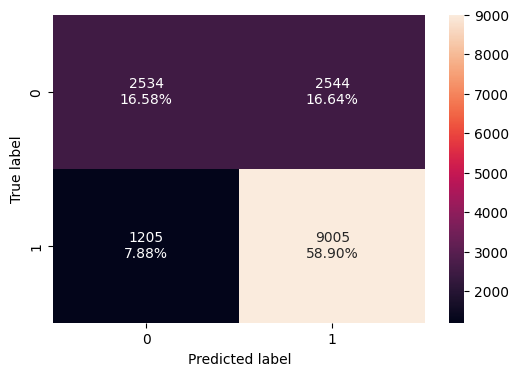

In [273]:
confusion_matrix_sklearn(tuned_adb, X_train, y_train)

- We have creeated Confusion matrix for test data
- We have TP = 9005(58.90%), TN = 2535(16.58%), FP = 2544(16.64%), FN = 1205(7.88%)

In [247]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.757,0.878,0.784,0.828


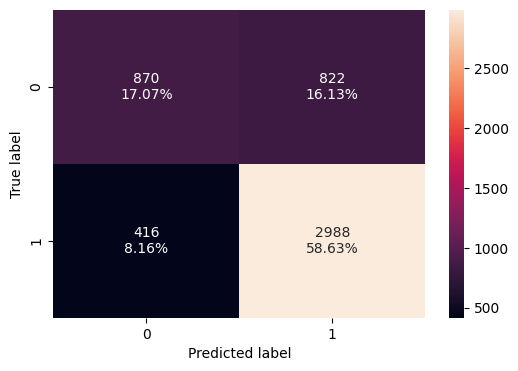

In [272]:
confusion_matrix_sklearn(tuned_adb, X_val, y_val)

- We have creeated Confusion matrix for test data
- We have TP = 2988(58.63%), TN = 87(17.07%), FP = 822(16.13%), FN = 416(8.16%)

##Hypertuning the GBM with Original datsets

In [248]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fittin g parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8244332737229255:
CPU times: user 5.76 s, sys: 654 ms, total: 6.42 s
Wall time: 4min 19s


In [249]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.5)

In [250]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.754,0.886,0.777,0.828


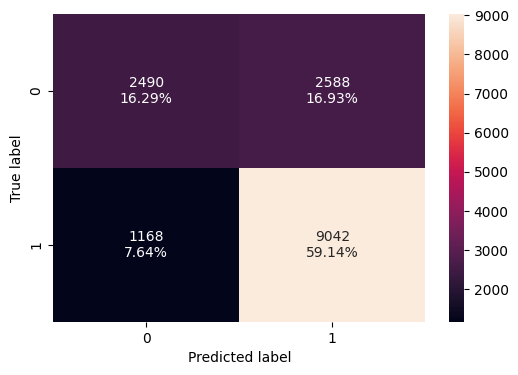

In [274]:
confusion_matrix_sklearn(tuned_gbm1, X_train, y_train)

- We have creeated Confusion matrix for train data
- We have TP = 9042(59.14%), TN = 2490(16.29%), FP = 2588(16.93%), FN = 1168(7.64%)

In [251]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.756,0.882,0.781,0.829


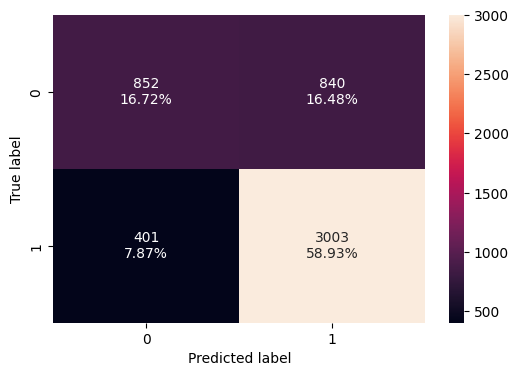

In [275]:
confusion_matrix_sklearn(tuned_gbm1, X_val, y_val)

- We have creeated Confusion matrix for Validation data
- We have TP = 3003(58.93%), TN = 852(16.72%), FP = 840(16.48%), FN = 401(7.87%)

##Hypertuning for Adaboost with Oversampled data

In [202]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7215392291222982:
CPU times: user 2.13 s, sys: 215 ms, total: 2.35 s
Wall time: 1min 11s


In [203]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb1.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

In [204]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(tuned_adb1, X_train_over, y_train_over)
adb_train1

,Accuracy,Recall,Precision,F1
0,0.760,0.908,0.700,0.791


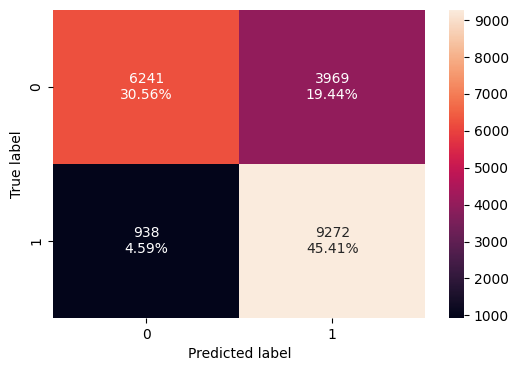

In [276]:
confusion_matrix_sklearn(tuned_adb1, X_train_over, y_train_over)

- We have creeated Confusion matrix for train data
- We have TP = 9272(45.41%), TN = 6241(30.56%), FP = 3969(19.44%), FN = 938(4.59%)

In [205]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1
0,0.738,0.908,0.752,0.823


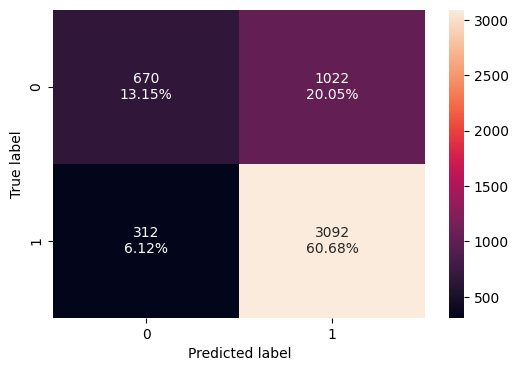

In [277]:
confusion_matrix_sklearn(tuned_adb1, X_val, y_val)


- We have creeated Confusion matrix for Validation data
- We have TP = 3092(60.68%), TN = 670(13.15%), FP = 1022(20.05%), FN = 312(6.12%)

##Hypertuning for Gradient Boost Model with Oversampled data

In [206]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8002365558361108:
CPU times: user 7.62 s, sys: 779 ms, total: 8.4 s
Wall time: 5min 32s


In [207]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

In [208]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.801,0.863,0.768,0.813


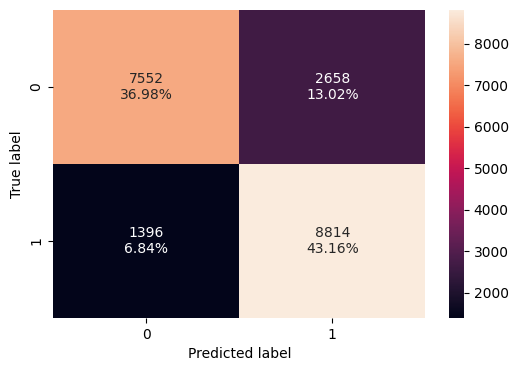

In [278]:
confusion_matrix_sklearn(tuned_gbm2, X_train_over, y_train_over)

- We have creeated Confusion matrix for train data
- We have TP = 8814(43.16%), TN = 7552(36.98%), FP = 2658(13.02%), FN = 1396(6.84%)

In [209]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.742,0.850,0.783,0.815


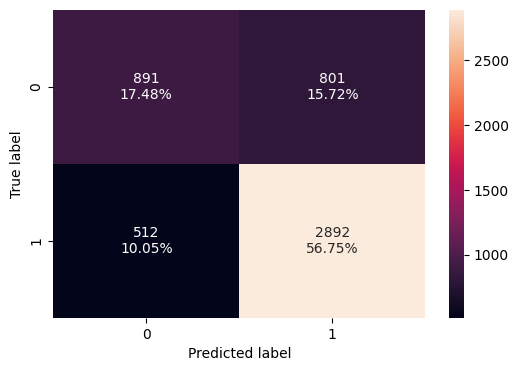

In [279]:
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

- We have creeated Confusion matrix for Validation data
- We have TP = 2892(56.75%), TN = 891(17.48%), FP = 801(15.72%), FN = 512(10.05%)

##Hypertuning with XGBoost for Oversampled data

In [210]:
# Choose the type of classifier.
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=parameters, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 50, 'learning_rate': 0.2, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7} with CV score=0.8116171817849693:


In [211]:
XGB_tuned = XGBClassifier(
    n_estimators= 50,
    scale_pos_weight=2,
    subsample=0.9,
    learning_rate=0.2,
    colsample_bytree=0.9,
    colsample_bylevel=0.7,
    random_state=1,
)
XGB_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [213]:
# Checking model's performance on training set
XGB_train = model_performance_classification_sklearn(XGB_tuned, X_train_over, y_train_over)
XGB_train

,Accuracy,Recall,Precision,F1
0,0.798,0.960,0.725,0.826


In [214]:
# Checking model's performance on validation set
XGB_val = model_performance_classification_sklearn(XGB_tuned, X_val, y_val)
XGB_val

,Accuracy,Recall,Precision,F1
0,0.729,0.934,0.733,0.821


##Hypertuning with XGBoost model for Original data

In [215]:
# Choose the type of classifier.
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=parameters, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7} with CV score=0.8236998098665081:


In [216]:
XGB1_tuned = XGBClassifier(
    n_estimators= 10,
    scale_pos_weight=1,
    subsample=0.9,
    learning_rate=0.2,
    colsample_bytree=0.9,
    colsample_bylevel=0.7,
    random_state=1,
)
XGB1_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [217]:
# Checking model's performance on training set
XGB1_train = model_performance_classification_sklearn(XGB1_tuned, X_train, y_train)
XGB1_train

,Accuracy,Recall,Precision,F1
0,0.759,0.890,0.780,0.832


In [218]:
# Checking model's performance on validation set
XGB1_val = model_performance_classification_sklearn(XGB1_tuned, X_val, y_val)
XGB1_val

,Accuracy,Recall,Precision,F1
0,0.753,0.883,0.778,0.827


#Checking Model Performance

In [252]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        adb_train1.T,
        gbm1_train.T,
        gbm2_train.T,
        XGB_train.T,
        XGB1_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "XG boosting trained with Oversampled data",
    "XG Boosting trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,XG boosting trained with Oversampled data,XG Boosting trained with Original data
Accuracy,0.755,0.760,0.754,0.801,0.798,0.759
Recall,0.882,0.908,0.886,0.863,0.960,0.890
Precision,0.780,0.700,0.777,0.768,0.725,0.780
F1,0.828,0.791,0.828,0.813,0.826,0.832


In [253]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        adb_val1.T,
        gbm1_val.T,
        gbm2_val.T,
        XGB_val.T,
        XGB1_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "XG boosting trained with Oversampled data",
    "XG Boosting trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,XG boosting trained with Oversampled data,XG Boosting trained with Original data
Accuracy,0.757,0.738,0.756,0.742,0.729,0.753
Recall,0.878,0.908,0.882,0.850,0.934,0.883
Precision,0.784,0.752,0.781,0.783,0.733,0.778
F1,0.828,0.823,0.829,0.815,0.821,0.827


- From scores got by Hypertuning models with Oversampled and undersampled in training and validation dataset we can conclude that Adaboost on Original data and Gradient boost on Original dataset is having better and similar performance and with better f1_score.
- So we are checking on the testing for these two models for Test dataset.

## Final Model Selection

In [254]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.740,0.875,0.768,0.818


- Adaboost model on Original data has ~81% of f1_score on test data.
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

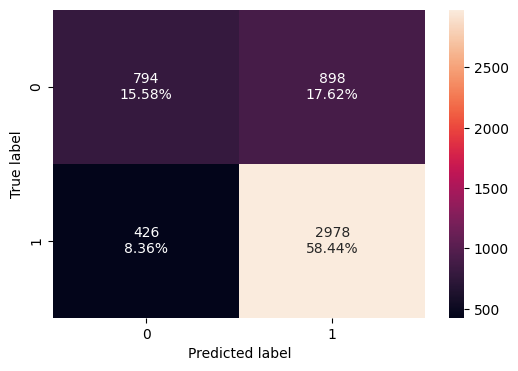

In [270]:
confusion_matrix_sklearn(tuned_adb, X_test, y_test)

- We have creeated Confusion matrix for test data for Adaboost
- We have TP = 2678(58.44%), TN = 794(15.58%), FP = 898(17.62%), FN = 426(8.36%)

In [255]:
# Let's check the performance on test set
GBM_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
GBM_test

,Accuracy,Recall,Precision,F1
0,0.739,0.877,0.766,0.818


- Gradient boosting model on Original dataset also has ~81% of f1_score which is similar to what we got on adaboost.
- This performance is also in line with what we achieved with this model on the train and validation sets.
- So, we also consider this as an generalized model.

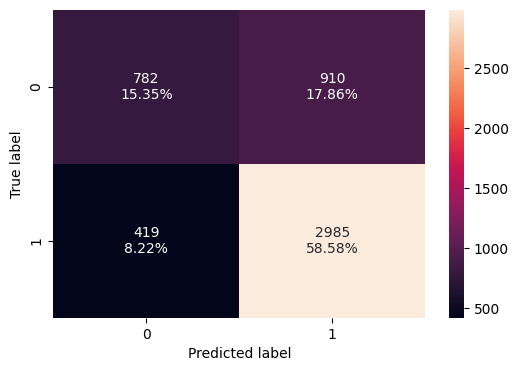

In [271]:
confusion_matrix_sklearn(tuned_gbm1, X_test, y_test)

- We have creeated Confusion matrix for test data
- We have TP = 2985(58.58%), TN = 782(115.35%), FP = 910(17.86%), FN = 419(8.22%)

**Final Model Selection**
- The final model that we suggest is Adaboost model whiuch we built for Original dataset. eventhough both model have similar F1 score, with accuracy, recall and precision we can conclude we are going with tuned_adb (Adaboost with Original data model).

#Feature Importance

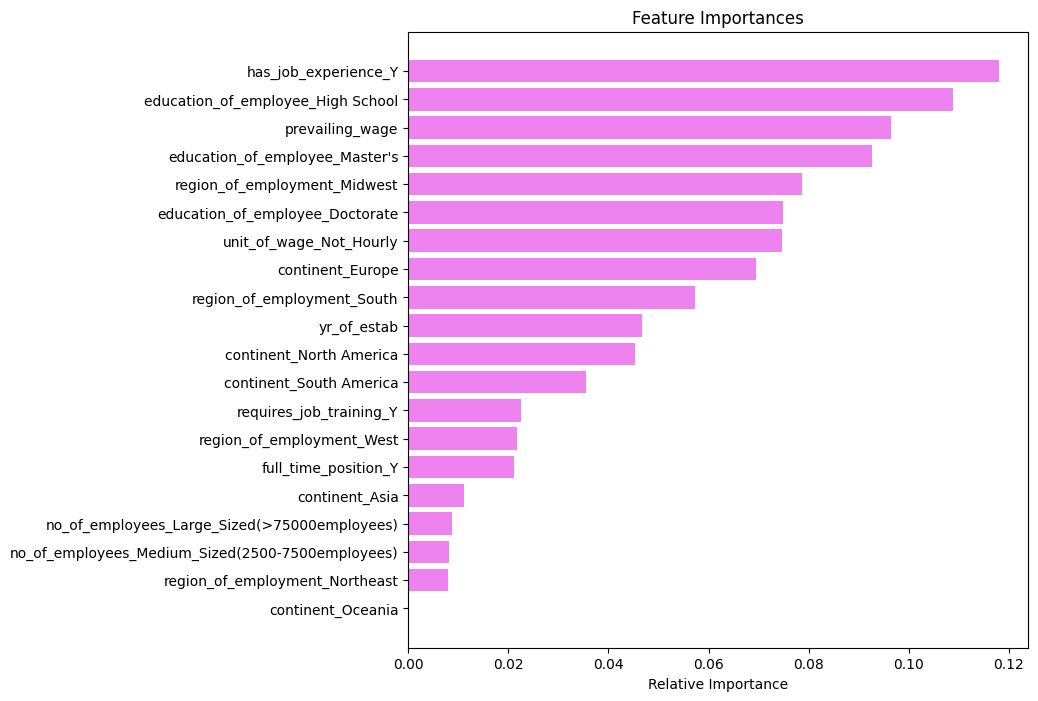

In [267]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that `has_experience_Y`, `education_of_employee_high_school`, `prevailing_wage`, `education_of_employee_master's` are most important features which is important in model predictions for adaboost model.

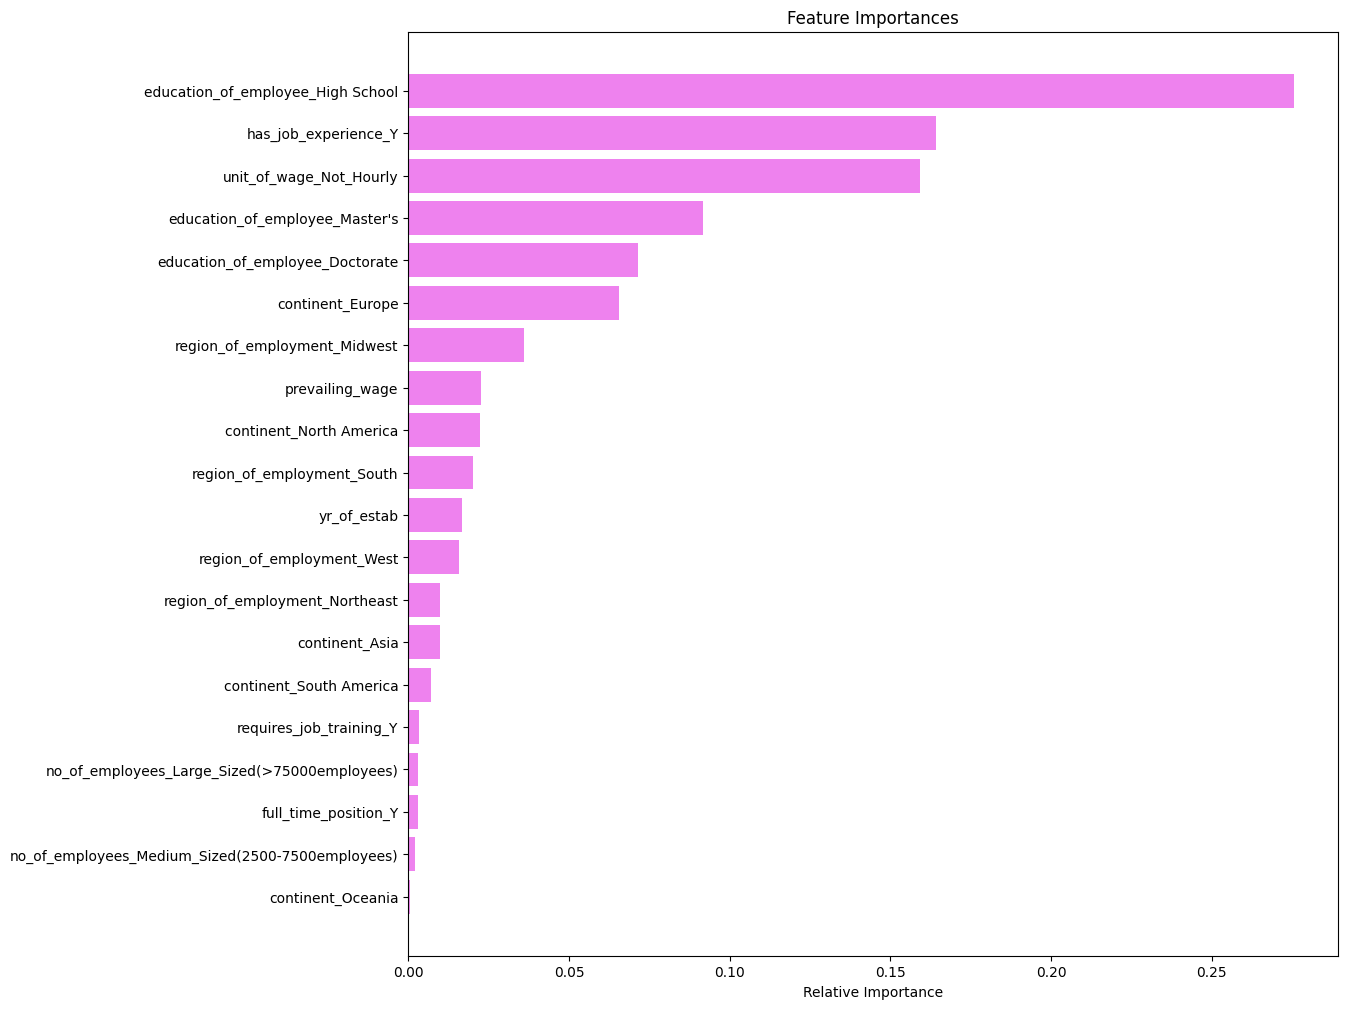

In [257]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that `education_of_employee_high_school`, `has_experience_Y`, `unit_of_wage_Not_Hourly`, `education_of_employee_master's` are most important features which is important in model predictions for Gradient Boost model.

**Actionable Insights for OFLC and Business Communities in the US**:

**Education and Job Experience as Key Factors**:
- Master's degree holders have a visa certification rate of 78.6%, while employees with a Doctorate see even better outcomes at 87.2%.
- Job experience also plays a critical role, with applicants who have prior experience seeing a 74.5% certification rate compared to only 56.1% for those without.
- Recommendation: US companies should focus on recruiting talent with higher educational qualifications and job experience, as these factors significantly improve the chances of visa certification.

**Wage Structures Impact Certification**:
- Employees with non-hourly wages (monthly or yearly) have a certification ra11te of 69.8%, compared to 34.6% for hourly wage earners. This discrepancy highlights the importance of stable, long-term compensation in visa approvals.
- Recommendation: US employers should offer non-hourly wage structures when possible to foreign workers. This aligns with the statutory requirements for fair wages and increases visa approval rates.

**Geographical Focus for Better Visa Success**:
- Applicants from Europe and Asia have higher success rates (79.2% and 65.3%, respectively). In contrast, regions like Africa and Oceania see lower approval rates.
- Recommendation: US businesses seeking foreign talent should target regions like Europe and Asia, where visa certifications are more likely, while refining applications for regions with lower success rates.

**Company Size and Visa Approvals**:
- Large companies (over 7,500 employees) have a 71.7% certification rate, significantly higher than smaller firms.
- Recommendation: Small and medium-sized enterprises (SMEs) can enhance their visa approval chances by emphasizing financial stability and growth potential in their applications. Partnering with larger firms or providing more robust support to applicants can further improve outcomes.

**Business Recommendations for EasyVisa and OFLC**:

**Leverage Data to Streamline Approvals**:
- Use Machine Learning models to identify key applicant profiles—such as those with advanced degrees and prior experience—that are more likely to receive visa certifications, streamlining the review process and reducing the burden on OFLC.

**Focus on Wages and Stability**:
- Encourage employers to offer competitive, non-hourly wage packages, as these are directly linked to higher visa approval rates. This supports compliance with INA's requirements for fair wages while also benefiting the employer's success in hiring foreign talent.

**Optimize Recruitment Based on Visa Success Regions**:
- Prioritize talent acquisition from regions like Asia and Europe, where historical data shows higher certification rates, while addressing the challenges of lower-certification regions through improved application processes.
- By implementing these insights, EasyVisa can enhance its ability to provide data-driven solutions, helping the OFLC and US businesses more effectively identify and certify qualified foreign talent.